OpenCV_실습

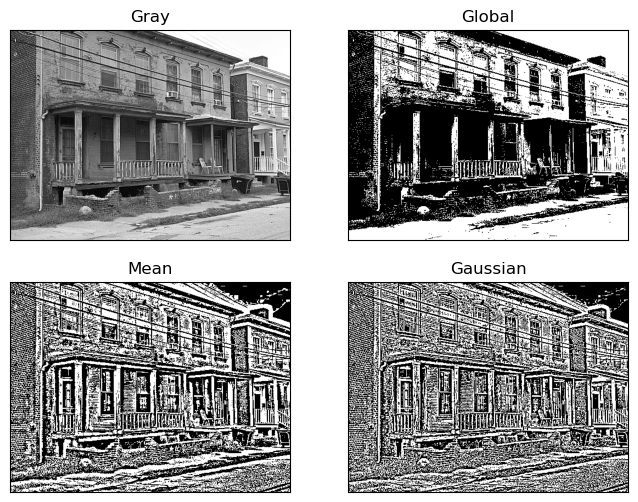

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_gray = cv2.imread('images/house.jpg', 0)

_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
adt_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 0)
adt_gaus = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 0)

titles = ['Gray', 'Global', 'Mean', 'Gaussian']
images = [img_gray, img_bin, adt_mean, adt_gaus]

plt.figure(figsize=(8,6))
for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

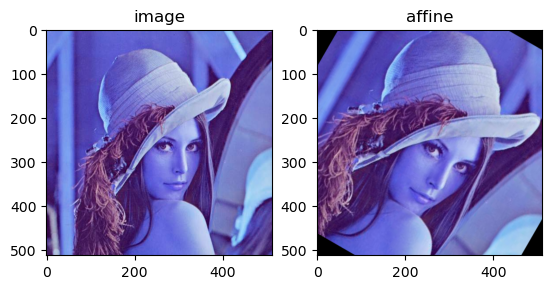

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((rows/2,cols/2), -30, 1.2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121)
plt.imshow(img)
plt.title('image')

plt.subplot(122)
plt.imshow(dst)
plt.title('affine')
plt.show()

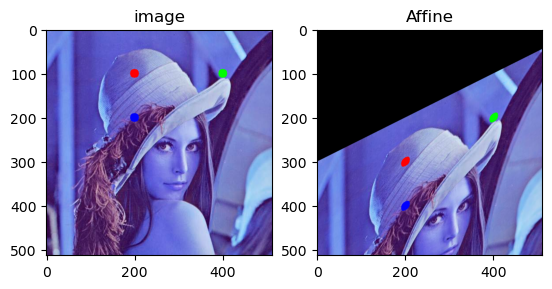

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100], [400,100], [200,200]])
pts2 = np.float32([[200,300], [400,200], [200,400]])

cv2.circle(img, (200,100), 10, (255,0,0), -1)
cv2.circle(img, (400,100), 10, (0,255,0), -1)
cv2.circle(img, (200,200), 10, (0,0,255), -1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('image')
plt.subplot(122), plt.imshow(dst), plt.title('Affine')
plt.show()


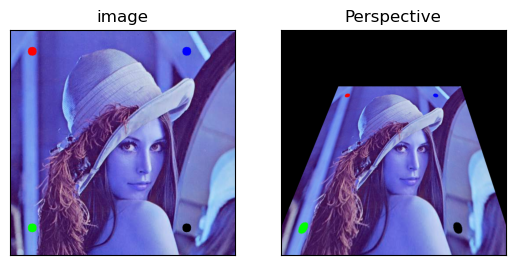

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')

pts1 = np.float32([[50,50],[50,450],[400,50],[400,450]])

pts2 = np.float32([[150,150],[50,450],[350,150],[400,450]])

cv2.circle(img, (50,50), 10, (255,0,0), -1)
cv2.circle(img, (50,450), 10, (0,255,0), -1)
cv2.circle(img, (400,50), 10, (0,0,255), -1)
cv2.circle(img, (400,450), 10, (0,0,0), -1)

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (512,512))

plt.subplot(121), plt.imshow(img), plt.title('image')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(dst), plt.title('Perspective')
plt.xticks([]), plt.yticks([])

plt.show()

In [2]:
import cv2
import numpy as np
from datetime import datetime
from time import sleep

points = np.zeros((4,2), dtype = np.float32)
count = 0

def mouseHandler(event, x,y, flags, param):
    global count
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 5, (0, 0, 255), -1)
        cv2.imshow("Capture", img)
        try:
            points[count] = [x,y]
            count += 1
            if count == 4:
                sum_ = points.sum(axis=1)
                diff = np.diff(points, axis=1)
                
                top_left = points[np.argmin(sum_)]
                bottom_right = points[np.argmax(sum_)]
                top_right = points[np.argmin(diff)]
                bottom_left = points[np.argmax(diff)]
                
                pts1 = np.float32([top_left, top_right, bottom_right, bottom_left])
                
                width_bottom = abs(bottom_right[0]) - bottom_left([0])
                width_top = abs(top_right[0]) - top_left([0])
                height_right = abs(top_right[1]) - bottom_right([1])
                height_left = abs(top_left[1]) - bottom_left([1])
                
                width = int(max([width_bottom, width_top]))
                height = int(max([height_right, height_left]))
                print(width, height)
                
                pts2 = np.float32([[0,0], [width-1, 0], [width-1, height-1], [0, height-1]])
                
                M = cv2.getPerspectiveTransform(pts1, pts2)
                
                dst = cv2.warpPerspective(img, M, (width, height))
                cv2.imshow("Capture", img)
                cv2.imshow("Scanned", dst)
        except Exception as e:
            print(e)
            
cap = cv2.VideoCapture(0)            
captured = False

if cap.isOpened():
    delay = int(1000/cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow("Capture", img)
            key = cv2.waitKey(delay)
            if key & 0xFF == 27:
                print("아무 작업도 하지 않고 종료함")
                break
            elif key == ord('c'):
                captured = True
                break
    
        else:
            print(ret, img)
            break
        
else:
    print("File not opened")
    
if captured:
    cap.release()
    while True:
        cv2.imshow("Capture", img)
        cv2.setMouseCallback("Capture", mouseHandler)
        key = cv2.waitKey(delay)
        if key & 0xFF == 27 :
            print("ESC Key pressed")
            break

cap.release()
cv2.destroyAllWindows()

'numpy.ndarray' object is not callable
ESC Key pressed


In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (9,9), 0)
    edges = cv2.Laplacian(img_gray, -1, None, 5)
    ret, sketch = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)
    sketch = cv2.medianBlur(sketch, 5)
    img_sketch = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)
    img_paint = cv2.blur(frame, (10,10))
    img_paint = cv2.bitwise_and(img_paint, img_paint, mask = sketch)
    
    merged = np.hstack((img_sketch, img_paint))
    cv2.imshow('Sketch Camera', merged)
    if cv2.waitKey(1) == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    if cv2.waitKey(1) == 27 : 
        break
        
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (9,9), 0)
    edges = cv2.Laplacian(img_gray, -1, None, 5)
    ret, sketch = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)
    
    kernel = np.array([[0,1,0], [1,1,1], [0,1,0]], dtype = np.uint8)
    
    sketch = cv2.medianBlur(sketch, 5)
    
    img_sketch = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)
    
    img_paint = cv2.blur(frame, (10, 10))
    
    img_paint = cv2.bitwise_and(img_paint, img_paint, mask = sketch)
    
    merged = np.hstack((img_sketch, img_paint))
    cv2.imshow('Sketch Camera', merged)
    
cap.release()
cv2.destroyAllWindows()